### 500 imagenes de cada clase en grayscale 

### Optimizador Adam learning_rate=0.001

### Epocas = 150

### 3 capas densas = ReLu, ReLu y Softmax

### Ultima capa = Sigmoid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import random
     
from keras.layers import Dropout
from keras.layers import Flatten

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

2024-05-24 13:18:02.117778: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path = 'Desktop/proyecto integrador/*'

In [3]:
#Data acquisition
noise = glob.glob("OK_etiquetadas_500-2/*.png")

nonoise = glob.glob("NOK_etiquetadas_500-2/*.png")

In [4]:
len(noise)

500

In [5]:
len(nonoise)

500

In [6]:
noise_Formated = []
nonoise_Formated = []

width = 400 
height = 250
dim = (width, height)

for i in noise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    noise_Formated.append(img_resized)

for i in nonoise:
    img_gray = mpimg.imread(i)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    nonoise_Formated.append(img_resized)

In [7]:
y_noise = np.ones(len(noise_Formated))
y_nonoise = np.zeros(len(nonoise_Formated))

In [8]:
X = np.vstack((noise_Formated,nonoise_Formated))
X.shape

(1000, 250, 400)

In [9]:
y = np.hstack((y_noise,y_nonoise))
y.shape

(1000,)

In [10]:
X=X/255

In [11]:
# 400 x 250 = 100,000
num_pixels = 100000
X = X.reshape(X.shape[0], num_pixels)
print(X.shape)

(1000, 100000)


In [12]:
model = Sequential()
model.add(Dense(units = 50, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │     5,000,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,000,670 (19.08 MB)

 Trainable params: 5,000,670 (19.08 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
print(X.shape)
print(y.shape)
print(y)

(1000, 100000)
(1000,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [14]:
# 10% para el set de prueba
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state = 42)

In [15]:
# 10% para el set de validacion
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size = 0.1, stratify=y_tv, random_state = 42)

In [16]:
model = Sequential()
model.add(Dense(units=1, input_dim=100000, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=32, epochs=150, 
                 validation_data=(X_val, y_val), shuffle='true')

Epoch 1/150
26/26 - 2s - 63ms/step - accuracy: 0.6259 - loss: 0.6784 - val_accuracy: 0.5667 - val_loss: 0.6641
Epoch 2/150
26/26 - 1s - 32ms/step - accuracy: 0.6123 - loss: 0.6518 - val_accuracy: 0.6778 - val_loss: 0.6432
Epoch 3/150
26/26 - 0s - 10ms/step - accuracy: 0.6617 - loss: 0.6325 - val_accuracy: 0.6778 - val_loss: 0.6281
Epoch 4/150
26/26 - 0s - 11ms/step - accuracy: 0.6815 - loss: 0.6192 - val_accuracy: 0.6778 - val_loss: 0.6168
Epoch 5/150
26/26 - 0s - 11ms/step - accuracy: 0.6802 - loss: 0.6065 - val_accuracy: 0.6889 - val_loss: 0.6073
Epoch 6/150
26/26 - 0s - 10ms/step - accuracy: 0.6802 - loss: 0.5975 - val_accuracy: 0.6889 - val_loss: 0.6001
Epoch 7/150
26/26 - 0s - 10ms/step - accuracy: 0.6827 - loss: 0.5894 - val_accuracy: 0.6889 - val_loss: 0.5937
Epoch 8/150
26/26 - 0s - 10ms/step - accuracy: 0.6889 - loss: 0.5839 - val_accuracy: 0.6889 - val_loss: 0.5896
Epoch 9/150
26/26 - 0s - 10ms/step - accuracy: 0.6914 - loss: 0.5777 - val_accuracy: 0.6778 - val_loss: 0.5856
E

Epoch 75/150
26/26 - 0s - 10ms/step - accuracy: 0.7494 - loss: 0.4847 - val_accuracy: 0.7444 - val_loss: 0.5234
Epoch 76/150
26/26 - 0s - 10ms/step - accuracy: 0.7519 - loss: 0.4842 - val_accuracy: 0.7444 - val_loss: 0.5231
Epoch 77/150
26/26 - 0s - 10ms/step - accuracy: 0.7494 - loss: 0.4825 - val_accuracy: 0.7444 - val_loss: 0.5228
Epoch 78/150
26/26 - 0s - 10ms/step - accuracy: 0.7494 - loss: 0.4820 - val_accuracy: 0.7444 - val_loss: 0.5222
Epoch 79/150
26/26 - 0s - 10ms/step - accuracy: 0.7457 - loss: 0.4812 - val_accuracy: 0.7333 - val_loss: 0.5223
Epoch 80/150
26/26 - 0s - 10ms/step - accuracy: 0.7519 - loss: 0.4807 - val_accuracy: 0.7444 - val_loss: 0.5213
Epoch 81/150
26/26 - 0s - 10ms/step - accuracy: 0.7531 - loss: 0.4794 - val_accuracy: 0.7444 - val_loss: 0.5214
Epoch 82/150
26/26 - 0s - 10ms/step - accuracy: 0.7543 - loss: 0.4787 - val_accuracy: 0.7444 - val_loss: 0.5209
Epoch 83/150
26/26 - 0s - 10ms/step - accuracy: 0.7543 - loss: 0.4780 - val_accuracy: 0.7444 - val_loss:

Epoch 148/150
26/26 - 0s - 10ms/step - accuracy: 0.7975 - loss: 0.4354 - val_accuracy: 0.7889 - val_loss: 0.4939
Epoch 149/150
26/26 - 0s - 10ms/step - accuracy: 0.7975 - loss: 0.4337 - val_accuracy: 0.7889 - val_loss: 0.4940
Epoch 150/150
26/26 - 0s - 10ms/step - accuracy: 0.7901 - loss: 0.4336 - val_accuracy: 0.7889 - val_loss: 0.4938


In [18]:
# resumen del model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │       100,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,005 (1.14 MB)

 Trainable params: 100,001 (390.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 200,004 (781.27 KB)

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - 10ms/step - accuracy: 0.6900 - loss: 0.5333


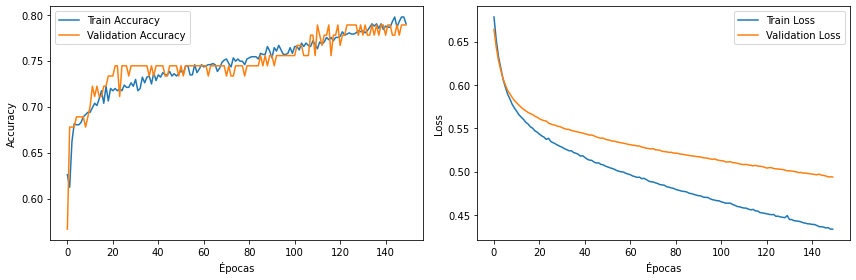

In [20]:
# Obtén los datos del historial
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']


# Gráfica de accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [21]:
y_proba_train = model.predict(X_train)
y_pred_train = y_proba_train.round().astype(int)
y_proba_validation = model.predict(X_val)
y_pred_validation = y_proba_validation.round().astype(int)
y_proba_test = model.predict(X_test)
y_pred_test = y_proba_test.round().astype(int)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [22]:
lbl = LabelEncoder()
target_names = ['class 0', 'class 1']
#Class 0 = NOK
#Class 1 = OK

In [23]:
!pip install -q scikit-plot
import scikitplot as skplt

In [24]:
print("Train sample \n", classification_report(y_train, y_pred_train,target_names = target_names))
print("Validation sample \n", classification_report(y_val, y_pred_validation,target_names = target_names))
print("Test sample \n", classification_report(y_test, y_pred_test,target_names = target_names))

Train sample 
               precision    recall  f1-score   support

     class 0       0.82      0.76      0.78       405
     class 1       0.77      0.83      0.80       405

    accuracy                           0.79       810
   macro avg       0.79      0.79      0.79       810
weighted avg       0.79      0.79      0.79       810

Validation sample 
               precision    recall  f1-score   support

     class 0       0.81      0.76      0.78        45
     class 1       0.77      0.82      0.80        45

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

Test sample 
               precision    recall  f1-score   support

     class 0       0.73      0.60      0.66        50
     class 1       0.66      0.78      0.72        50

    accuracy                           0.69       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.70  

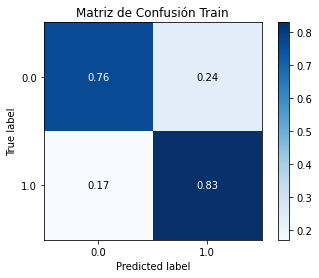

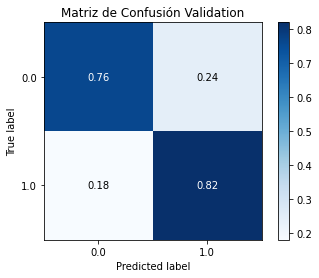

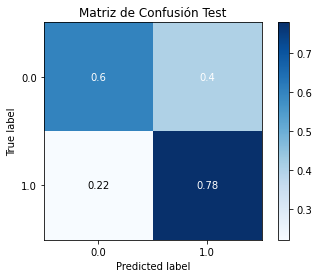

In [25]:
# Gráfico de Matriz de Confusión
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_val, y_pred_validation, normalize=True)
plt.title('Matriz de Confusión Validation')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.title('Matriz de Confusión Test')

plt.show() 